# Анализ рынка продаж компьютерных игр

# Описание проекта:

В нашем распоряжении данные до 2016 года из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Информация хранится в файле:**  /datasets/games.csv

**Данные включают в себя:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

**Цель исследования:**
На основании данных и проведенного анализа выявить закономерности, определяющие успешность игры. *Это нужно для того, что спланировать рекламную кампанию на следующий год.*

**В ходе работы будут проверены гипотезы:**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Ход исследования:**

Исследование пройдет в 4 этапа:
1. Обзор данных;
2. Предобработка данных;
3. Анализ данных;
4. Проверка гипотез.

**Использованы библиотеки и методы:**
- pandas
- matplotlib.pyplot
- seaborn
- SciPy
- numpy

# Обзор данных

In [1]:
#импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#чтение файла с данными и сохранение в переменную games

try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('games.csv')

In [3]:
#Выведем датафрейм user и изучим его
games.info()
pd.set_option('display.max_columns', None)
display(games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Изучим датафрейм. В нем содержится 11 столбцов. Согласно документации, это:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

**Выводы:**
После ознакомления с таблицей видны недоточеты: названия некоторых столбоц не в нижнем регистре, некорректные типы данных (например, год релиза с типом float, оценка пользователей с типом object).
Кроме того необходимо проверить данные на наличие явных и неявных дубликатов и, там где необходимо, устранить пропуски.

# Предобработка данных

Приведем названия столбцов в нижнему регистру

In [4]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Пропуски**

*year_of_release*

In [5]:
#кол-во проусков
display(games['year_of_release'].isna().sum()) 

#доля пропусков
games['year_of_release'].isna().sum()/len(games['year_of_release']) 

269

0.01609332934489979

In [6]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Доля пропусков очень маленькая, поэтому можем удалить строки без вреда для анализа

In [7]:
#удаляем строки c пропущенными значениями
games = games.dropna(subset=['year_of_release']).reset_index(drop=True) 

*name*

В столбце "name" тоже имеются пропуски. Посмотрим

In [8]:
#кол-во проусков
display(games['name'].isna().sum()) 

#удаляем строки, так как их мало
games = games.dropna(subset=['name']).reset_index(drop=True) 

2

*user_score*

In [9]:
(games.loc[games['user_score'].notna()]['user_score'].sort_values(ascending=False).unique())

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0'], dtype=object)

В столбце user_score кроме числовых значений и NaN есть tbd - to be defined. Заменим "tbd" (предстоит определить - по факту пропуск) на Nan

In [10]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')

*critic_score*

In [11]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

В данном столбце все нормально

critic_score & user_score

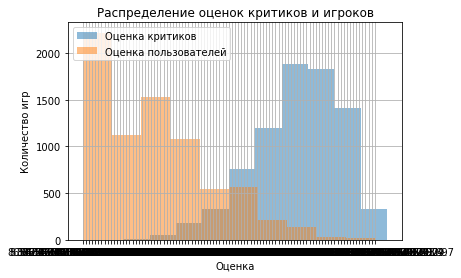

In [12]:
fig, ax = plt.subplots()
games.critic_score.hist(ax=ax, label='Оценка критиков', alpha=0.5)
(games.user_score*10).hist(ax=ax, label='Оценка пользователей', alpha=0.5)
ax.legend(loc='upper left')
ax.set_xlabel('Оценка')
ax.set_ylabel('Количество игр')
ax.set_title('Распределение оценок критиков и игроков')
plt.alpha=0.5
plt.show()

Оценки пользователей и критиков практически совпадают, однако разброс оценки у критиков меньше, что понятно.

*rating*

In [13]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone». Градация устарела

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio(aнг.), выпущенная в 1996 году.

«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.

T («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

«M» («Mature») — «От 17 лет»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. Некоторые торговые сети не продают игры с таким рейтингом несовершеннолетним без согласия родителей.

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. В 2006-м году данный рейтинг получили 22 продукта, большинство из которых предназначены для персональных компьютеров под управлением Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.

«RP» («Rating Pending»“) — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.

«K-A» («Kids to Adults»)— «Для детей и взрослых». Градация устарела - сейчас «E»

аббревиатуру "K-A" и "EC" заменим на "E", так как они устарели

In [14]:

games['rating'] = games['rating'].replace('K-A', 'E')
games['rating'] = games['rating'].replace('EC', 'E')

Прочие пропуски в оченках критиков трогать не будем, так как очевидно, что не все игры были оценены критиками/доходила до широких масс публики

In [15]:
games.rating.isna().sum()

6676

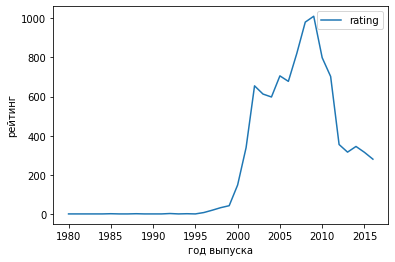

In [16]:
plot = games.groupby('year_of_release')['rating'].count().reset_index().plot(x='year_of_release')
plt.xlabel('год выпуска')
plt.ylabel('рейтинг')
plt.show;

Имеются пропуски. Учитывая, что рейтинг был образован в 1994, а в датафреймы игры есть начиная с 1980, то отсутствие данных - это нормально. Тоже самое наблюдаем и на графике: с 1994 года начали активно даваться оценки. Заменим пропуски на 'nd' not defined

In [17]:
games['rating'] = games['rating'].fillna(value='nd')

**Поменяем типы данных**

In [18]:
#Изменим тип данных оценки пользователей, как у остальных оценок с object на float
games['user_score'] = games['user_score'].astype(float) 

In [19]:
#Изменим у года релиза тип данных на целочисленный, так как не может быть год 2001,0.
games['year_of_release'] = games['year_of_release'].astype('int') #меняем тип данных на целочисленный

**Дубликаты**

Найдем дубликаты по столбцам: name, platform, year_of_release 

In [20]:
display(games.loc[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]) #выведем дубликаты
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first') #удалим дубликаты

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Посмотрим есть ли случаи, когда повторяются названия на одной платформе

In [21]:
games[games.groupby(games.name + games.platform)['name'].transform('count') > 1].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1177,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5883,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11534,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


У нас разные года, так что оставляем!

**Мировые продажи**

Создадим столбец с суммарными продажами во всех регионах

In [22]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [23]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,nd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,nd,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,nd,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,nd,28.31


In [24]:
games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000
mean,0.264028,0.145939,0.078492,0.047597,0.536055
std,0.818400,0.506731,0.311109,0.188011,1.558828
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.030000,0.470000
max,41.360000,28.960000,10.220000,10.570000,82.540000


**Продажи игр по регионам**

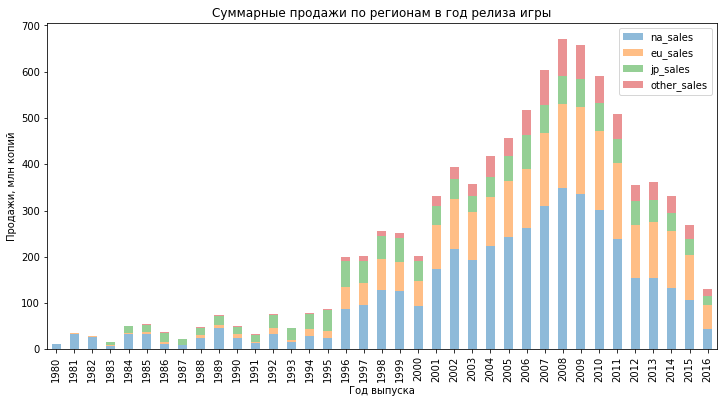

In [25]:

fig, ax = plt.subplots()

(games
    .groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
    .agg('sum')
    .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи по регионам в год релиза игры')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Год выпуска')
plt.show()

Из графика видно, что активно начали продавать игры с 1996 года, когда продажи подскочили со 100 млн. копий до 200 млн. копий, а также в 2001 году, когда продажи подскочили еще на 30%. С 2008 года продается все меньше и меньше копий. Самый крупный регион по продажам - Северная Америка, самый мелкий - Японий (не считая прочие страны).

**Выпуск игр по годам**

In [26]:
games_years = games.pivot_table(index = 'platform',
                                columns = 'year_of_release',
                                values = 'name',
                                aggfunc = 'count',
                                fill_value=0,
                                margins=True
                               ).reset_index()

pd.set_option('display.max_columns', None)
games_years

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
0,2600,9,46,36,11,1,1,2,6,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116
1,3DO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,3DS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,93,91,80,86,46,512
3,DC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,14,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,52
4,DS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,118,201,376,492,403,323,153,23,8,0,0,0,2121
5,GB,0,0,0,0,0,0,0,0,1,10,3,9,7,0,3,4,6,8,8,11,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97
6,GBA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,107,198,150,175,135,39,6,0,0,0,0,0,0,0,0,0,811
7,GC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,152,144,83,97,40,4,0,0,0,0,0,0,0,0,0,542
8,GEN,0,0,0,0,0,0,0,0,0,0,1,1,6,7,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27
9,GG,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Посмотрим сколько всего

In [27]:
games_years[games_years['platform'] == 'All']

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
31,All,9,46,36,17,14,14,21,16,15,17,16,41,43,60,121,219,263,289,379,338,350,482,829,775,762,939,1006,1197,1427,1426,1255,1136,652,544,581,606,502,16443


In [28]:
games_years[['platform', 'All']].sort_values(by='All', ascending=False).head(10)

year_of_release,platform,All
31,All,16443
16,PS2,2127
4,DS,2121
17,PS3,1305
26,Wii,1286
28,X360,1232
19,PSP,1193
15,PS,1190
13,PC,957
6,GBA,811


Видим, что наибольшее число игр было выпущено на PS2, и выпускались они на протяжении 16 лет; а наименьшее число игр на GBA, и выпускались они всего 6 лет. Самое большое количество лет, когда игры выпускались, составляет 28 лет на платформу X360, самое меньшее 4, на платформу DS

**Визуализиция кол-ва выпущенных игр по годам**

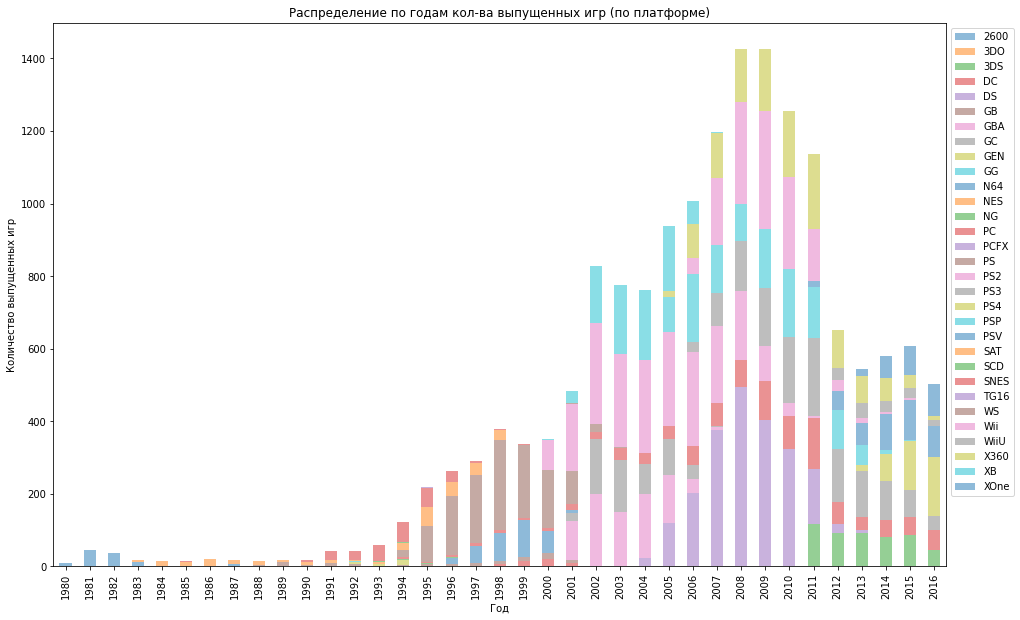

In [29]:
fig, ax = plt.subplots()

games.pivot_table(index='platform',
                 columns='year_of_release',
                 values='name',
                 aggfunc='count').T.plot(kind='bar',stacked=True, ax=ax, figsize=(16,10), alpha=0.5)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Распределение по годам кол-ва выпущенных игр (по платформе)')
ax.set_ylabel('Количество выпущенных игр')
ax.set_xlabel('Год')
plt.show()

Итак, из графика мы видим, что до 1991 года количество выпущенных игр практически не менялось, после 1991 года начался цикл роста выпущенных игр до 1998 года, достигнув порядка 400 игр/год. После 2001 года количество игр резко начало расти, что теоретически можно связать с началом цикла цифровых компаний (после пузыря доткомов 2001 года). Кроме этого, до 2001 года доминирующая доля игр выходила на PS. После резкого скачка выпуска игр в 2002 году, основная доля выходила на PS2, PS3, X360, XB и тд.

Выводы по графику:

- Наибольшая доля игр выпущена в период с 2002 по 2011 гг.;
- Самые популярные платформы: до 2002 г. WS (wander swan); после 2002 г. PS - PS2/PS3 - (Sony); DS и Wii (Nintendo); X360 (Microsoft)
- Игровые платформы постоянно меняются
- После 2011 года выпуска игр пошел на спад

**Продажи**

Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [30]:
games[['platform', 'total_sales']].sort_values(by='total_sales', ascending=False).head(10)

,platform,total_sales
0,Wii,82.54
1,NES,40.24
2,Wii,35.52
3,Wii,32.77
4,GB,31.38
5,GB,30.26
6,DS,29.80
7,Wii,28.91
8,Wii,28.32
9,NES,28.31


In [31]:
#отсортируем платформы по продажам

games.groupby('platform').sum()[['total_sales']].reset_index().sort_values(
by='total_sales', ascending=False
).head(10)



,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Наибольшие продажи у первых 6 платформ

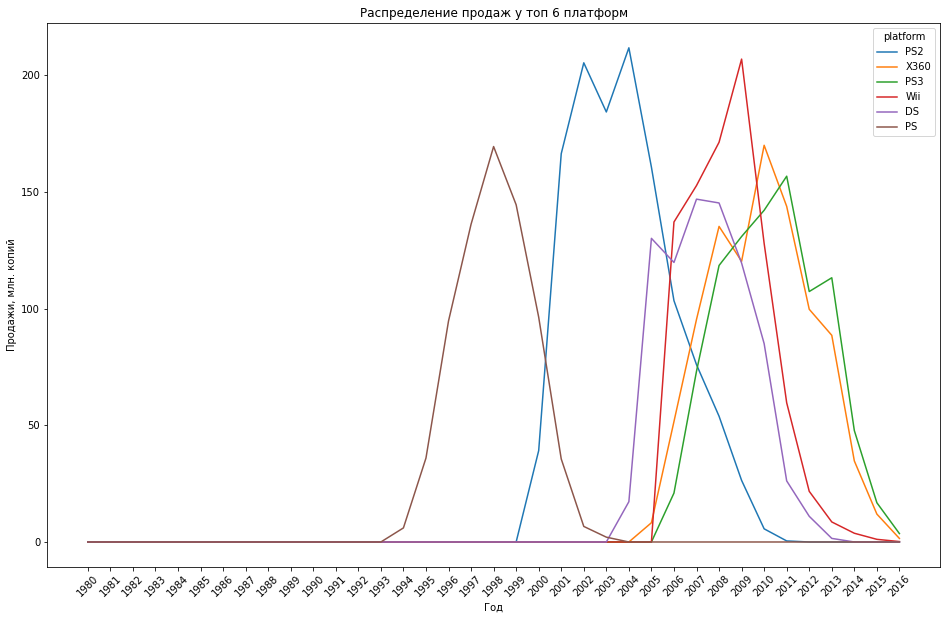

In [32]:
platform_most_sales = games.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales',
    aggfunc = 'sum'
    ).fillna(0)
platform_most_sales = platform_most_sales[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']]

ax = platform_most_sales.plot(xticks=platform_most_sales.index, figsize=(16,10), rot=45)
ax.set_title('Распределение продаж у топ 6 платформ')
ax.set_ylabel('Продажи, млн. копий')
ax.set_xlabel('Год')
plt.show()

Очевидно, что на графике продаж копий игр по каждой из самых популярных платформ в истории прослеживается цикличность (1993-2004, 1999-2011, 2003-2014, 2005-2016, 2004-2016 - около 11-12 лет). То есть, платформы от расцвета до своего заката проживают 12 лет. Таким образом, на основании данного графика, можно сделать вывод, что при прогнозировании продаж следует обращать внимания на платформы, которые вошли в растущий тренд (находятся в нем 4-5 лет). Таким образом, у нас будет еще порядка 2-3 лет роста и 6 лет постепенного спада. 

**На основании информации выше, можем выбрать актуальный временной промежуток для исследования 2012-2016 гг.**

Итак, углубимся в данные за выбранный временной промежуток с 2012-2016 гг.

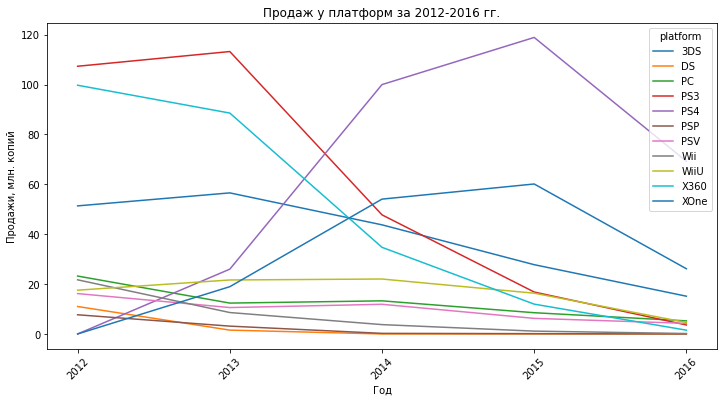

In [33]:
games_sales = games.query('year_of_release >= 2012').pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales',
    aggfunc = 'sum'
    ).fillna(0)

ax = games_sales.plot(xticks=games_sales.index, figsize=(12,6), rot=45)
ax.set_title('Продаж у платформ за 2012-2016 гг.')
ax.set_ylabel('Продажи, млн. копий')
ax.set_xlabel('Год')
plt.show()

   
 На графике выше видно, что в выбранный период с 2012-по 2016 гг. попали 11 платформ. Видно, что к концу 2016 года наибольшее количество проданых игр имеют платформы от Sony - PS4 и Microsoft - XOne, а также меньшее количество у PS3, X360, 3DS, WiiU.  

 Прочие платформы, которые в начале выбранного периода имели вес, такие как: X360, PS3 - на  текущий момент пошли на спад. Интересно наблюдать, как в начале периода прошлое поколение консолей от Sony&Microsoft занимали лидирующие позиции, а после их сменило следующее поколение консолей в середине временного промежутка - PS4 & XOne

 Занимательно, что такие консоли, как: DS, PC, PSV, PSP, Wii не показывали практически никаких движений на графике, то есть игры на платформы уже не выпускаются. Думаю, что бывших лидеров продаж - PS3 и X360 ждет подобная судьба.
  
 **Для дальнейшего анализа перспектив выделим платформы: PS4, XOne, PS3, X360, WiiU, 3DS**

In [34]:
#создадим новую таблицу с данными

games_pick = games.query('year_of_release >= 2012 & platform in ["PS4", "XOne", "PS3", "X360", "WiiU", "3DS"]').reset_index(drop=True)
games_pick

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,nd,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,nd,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
1961,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
1962,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,nd,0.01
1963,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,nd,0.01
1964,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,nd,0.01


**Boxplot**

Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам

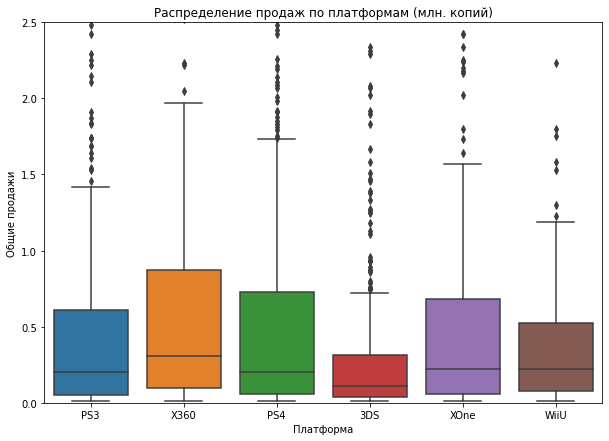

In [35]:
#задаем размер
plt.figure(figsize =(10, 7))
#выберем данные
ax = sns.boxplot(x='platform', y='total_sales', data=games_pick)
#зададим ограничения, чтобы минизировать выбросы
ax.set_ylim(0, 2.5)
#зададим названия осей
ax.set_ylabel('Общие продажи')
ax.set_xlabel('Платформа')
ax.set_title('Распределение продаж по платформам (млн. копий)')
plt.show()

График свидетельствует о том, что в среднем медианные значения продаж на всех платформах смещены к нижней границе - то есть много игр с низкими продажами, а выбросы говорят о том, что на всех платформах выходят "хиты", которые превышают медианные продажи в несколько раз

**Зависимость оценок и продаж**

In [36]:
#возьмем среднее, так как огромных выбросов в данных об оценках нет
games_pick.groupby('platform')['critic_score', 'user_score'].agg('mean').round()

,critic_score,user_score
platform,,
3DS,70.0,7.0
PS3,72.0,7.0
PS4,72.0,7.0
WiiU,71.0,7.0
X360,71.0,6.0
XOne,73.0,7.0


Посмотрим зависимость продаж на платформе XOne от **отзывов критиков** с помощью коэффициента корреляции Пирсона

In [37]:
games_pick.query('platform == "XOne"')['total_sales'].corr(games_pick.query('platform == "XOne"')['critic_score'])

0.41699832800840175

Посмотрим зависимость продаж на платформе XOne от **отзывов пользователей** и с помощью коэффициента корреляции Пирсона

In [38]:
games_pick.query('platform == "XOne"')['total_sales'].corr(games_pick.query('platform == "XOne"')['user_score'])

-0.06892505328279412

**Построим графики**

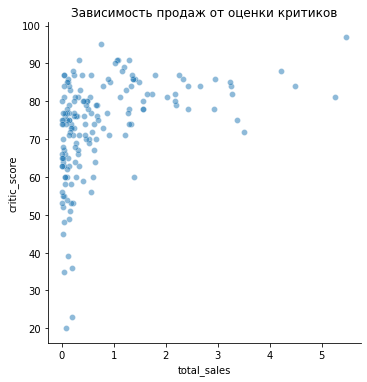

In [39]:
sns.relplot(x='total_sales', y='critic_score', data=games_pick.query('platform == "XOne"'), kind='scatter', alpha=0.5);
plt.title('Зависимость продаж от оценки критиков');

**Вывод:** Итак, коэффициент корреляции Пирсона между оценками критиков и общими продажами составляет 0,417; что свидетельствует о незначительной корреляции. Однако, можно видеть на графике, как от 70 до 90 баллов выручка заметно увеличивается, а также появляются выбросы в значениях выручки. Таким ообразом, можно сделать вывод, что критики, действительно, могут определить потенциально "хитовую" игру, которая значителбно превысит медианное значение продаж

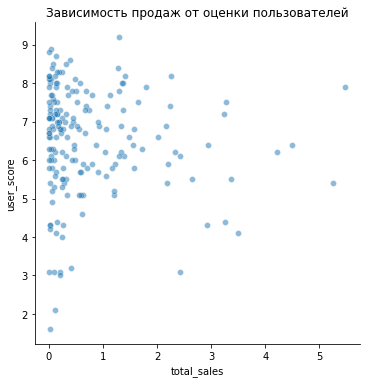

In [40]:
sns.relplot(x='total_sales', y='user_score', data=games_pick.query('platform == "XOne"'), kind='scatter', alpha=0.5);
plt.title('Зависимость продаж от оценки пользователей');

**Вывод:** Итак, коэффициет корреляции Пирсона между оценками пользователей и общими продажами игр на платформе составляет -0,689; что свидетельствует об отсутствии какой-либо корреляции между значениями. Больше всего продаж находится в интервале оценок от 5 до 8, в этом же промежутке больше всего и выбросов ("хитовых" игр).

In [41]:
games_pick

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,nd,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,nd,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
1961,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
1962,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,nd,0.01
1963,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,nd,0.01
1964,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,nd,0.01


In [42]:
platforms_pick = games_pick['platform'].unique()

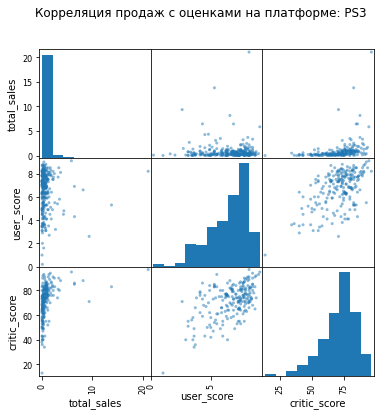

,total_sales,user_score,critic_score
total_sales,1.000000,-0.006206,0.334152
user_score,-0.006206,1.000000,0.544510
critic_score,0.334152,0.544510,1.000000


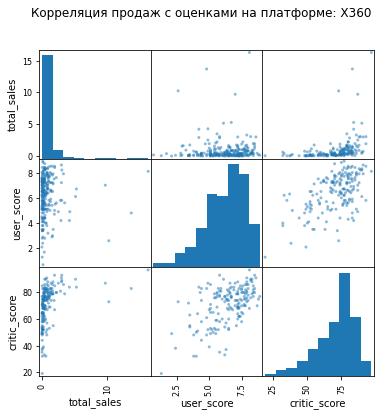

,total_sales,user_score,critic_score
total_sales,1.000000,0.006164,0.360573
user_score,0.006164,1.000000,0.557352
critic_score,0.360573,0.557352,1.000000


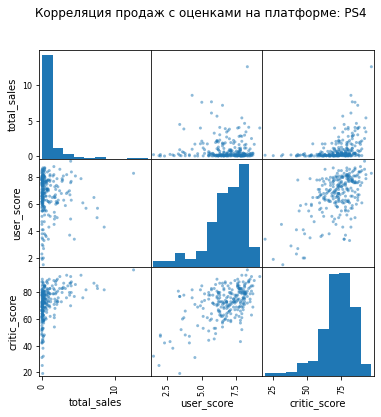

,total_sales,user_score,critic_score
total_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


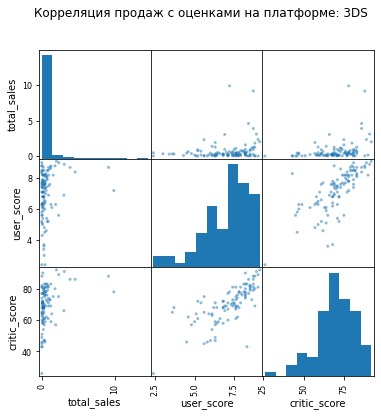

,total_sales,user_score,critic_score
total_sales,1.000000,0.197583,0.320803
user_score,0.197583,1.000000,0.722762
critic_score,0.320803,0.722762,1.000000


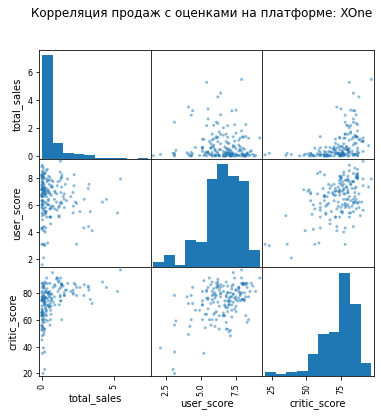

,total_sales,user_score,critic_score
total_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


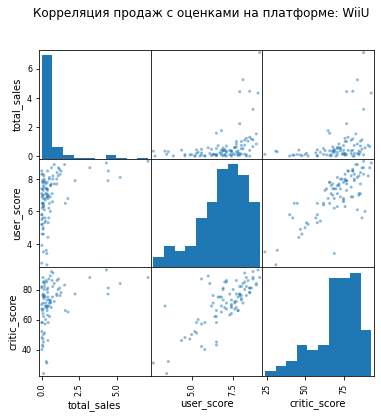

,total_sales,user_score,critic_score
total_sales,1.000000,0.400219,0.34838
user_score,0.400219,1.000000,0.77008
critic_score,0.348380,0.770080,1.00000


In [43]:
for platform in platforms_pick:
    i = games_pick.query('platform == @platform')[['total_sales', 'user_score', 'critic_score']]
    fig, ax = plt.subplots(figsize=(6,6))
    pd.plotting.scatter_matrix(i, ax=ax) 
    fig.suptitle(f'Корреляция продаж с оценками на платформе: {platform}')
    plt.show()
    
    display(games_pick.query('platform == @platform')[['total_sales', 'user_score', 'critic_score']].agg('corr'))

Очевидно, что на всех платформах оценка критиков хоть немного, но влияет на продажи копий игр. Коэффициент Пирсона лежит в пределах от 0.3 до 0.4, что свидетельствует о небольшой прямой зависимости. Оценка пользователей никак не влияет на продажи копий игр. 

**Распределение игр по жанрам**

In [44]:
#посмотрим, что есть

games_pick['genre'].value_counts()

Action          721
Role-Playing    226
Sports          210
Shooter         190
Misc            138
Adventure       136
Fighting         88
Racing           85
Platform         70
Simulation       50
Strategy         33
Puzzle           19
Name: genre, dtype: int64

In [45]:
games_pick.groupby('genre')['total_sales'].agg('sum')

genre
Action          395.32
Adventure        22.85
Fighting         41.80
Misc             61.24
Platform         55.66
Puzzle            4.04
Racing           50.05
Role-Playing    154.15
Shooter         288.12
Simulation       25.36
Sports          170.96
Strategy          6.03
Name: total_sales, dtype: float64

In [46]:
games_genre_sales_pivot = games_pick.pivot_table(
    index='genre',
    columns='platform',
    values='total_sales',
    aggfunc='sum',
    margins=True #добавим агрегирование
).fillna(0).sort_values(
    by='All',
    ascending=False
)

games_genre_sales_pivot

platform,3DS,PS3,PS4,WiiU,X360,XOne,All
genre,,,,,,,
All,194.61,288.78,314.14,82.19,236.54,159.32,1275.58
Action,45.49,115.75,96.10,19.07,81.60,37.31,395.32
Shooter,0.13,60.39,88.56,6.01,72.70,60.33,288.12
Sports,4.23,44.83,55.61,3.16,36.39,26.74,170.96
Role-Playing,79.30,22.62,28.99,2.89,9.80,10.55,154.15
Misc,9.45,8.88,8.19,12.46,14.83,7.43,61.24
Platform,19.11,4.26,7.69,21.53,2.14,0.93,55.66
Racing,0.28,11.56,12.14,7.87,8.41,9.79,50.05
Fighting,8.46,11.00,8.65,6.27,4.97,2.45,41.80


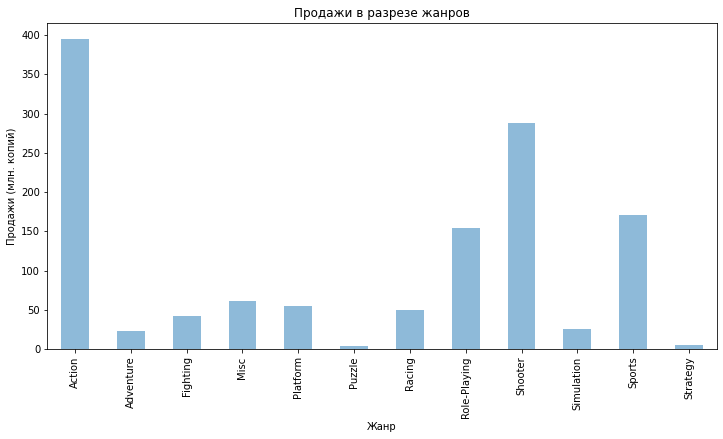

In [47]:
fig, ax = plt.subplots(figsize=(12,6))

(games_pick
    .groupby('genre')['total_sales']
    .agg('sum')
    .plot(kind='bar', ax=ax, alpha=0.5))

ax.set_title('Продажи в разрезе жанров')
ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи (млн. копий)')
plt.show()

Очевидно, что самыми прибильными жанрами стали: Action, Shooter, Role-Playing и Sports

Выделяются среди прочих жанры с самыми низкими продажами - Puzzle и Strategy

Попробуем взять средние данные, чтобы избежать выбросов в продажах игр

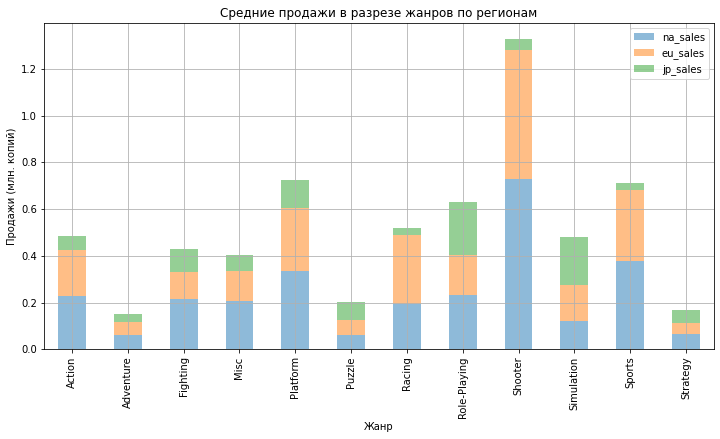

In [48]:
fig, ax = plt.subplots(figsize=(12,6))

(games_pick
    .groupby('genre')[['na_sales','eu_sales', 'jp_sales']]
    .agg('mean')
    .plot(kind='bar', stacked=True, ax=ax, figsize=(12,6), alpha=0.5, grid=True))

ax.set_title('Средние продажи в разрезе жанров по регионам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи (млн. копий)')
plt.show()

Создали график со средними продажами в разрезе жанров по регионам. Из графика выше видно, что данные распределены немного иначе, нежели на графике с общими продажами. Средние значения сглаживают углы, которые образуют "стрельнувшие" игры. Видно, что в среднем самый  продаваемый жанр - Shooter, хотя на предыдущем графике это Action. На втором и третьем месте стоят Platform и Sports, в то время как Action вообще вышел из пятерки лидеров.   


In [49]:
games_pick.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,nd,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,nd,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


# Составим портрет пользователя каждого региона (NA, EU, JP)

*самые популярные платформы по регионам*

In [50]:
games_pick.pivot_table(
    index='platform',
    values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum').apply(
    lambda col: col/col.sum(),
    axis=0).round(3)

,eu_sales,jp_sales,na_sales
platform,,,
3DS,0.097,0.570,0.103
PS3,0.242,0.229,0.192
PS4,0.319,0.104,0.202
WiiU,0.057,0.085,0.071
X360,0.169,0.010,0.260
XOne,0.117,0.002,0.173


Из таблицы выше видно, что типичный европейский потребитель предпочитает платформы от фирмы Sony (PS3, PS4) - 0,57 от общей доли рынка; типичный американец - Microsoft - 0,433 от доли рынка (доля Sony 0,394); тёпичный японец предпочитает консоль от Nintendo - 0,57 от доли рынка приходится на 3DS

Различия в доля для американского и японского рынка понятны - прежде всего это родина соответсвующих компаний. Насчет популярности Sony на европейском рынке: на просторах интернета она объясняется значительной простотой купить консоль в первый год выхода в отличии от конкурента Microsoft. Возможно, именно поэтому и присутствует такое различие.

*самые популярные жанры по регионам*

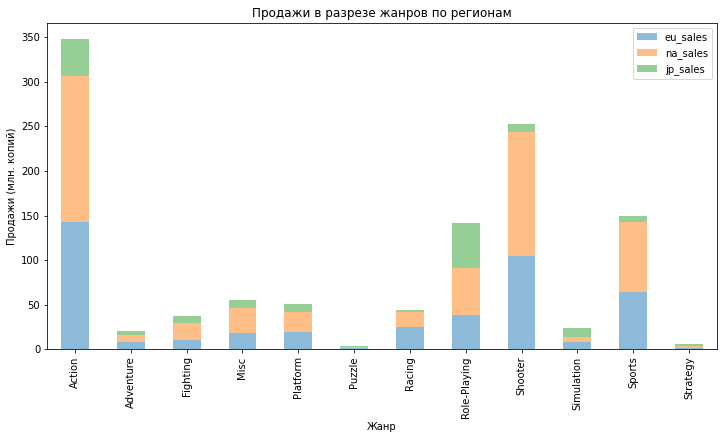

In [51]:
fig, ax = plt.subplots(figsize=(12,6))

(games_pick
    .groupby('genre')[['eu_sales', 'na_sales', 'jp_sales']]
    .agg('sum')
    .plot(kind='bar', stacked=True, ax=ax, alpha=0.5))

ax.set_title('Продажи в разрезе жанров по регионам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи (млн. копий)')
plt.show()

Топ 5 Северной Америки: Action > Shooter > Sports > Role-Playing > Misc
Топ 5 Европы: Action > Shooter > Sports > Role-Playing > Racing
Топ 5 Японии: Role-Playing > Action > Simulation > Shooter > Misc

У американцев и европейцев вкусы схожи - они играют в шутеры, action и спорт, японцы играют в совсем другие игры - ролевые, action и симуляции. 

*Влияет ли рейтинг ESRB на продажи в отдельном регионе*

In [52]:
games_pick.pivot_table(
    index='rating',
    values=['eu_sales', 'na_sales', 'jp_sales'],
    aggfunc='sum'
).apply(
    lambda col: col/col.sum(),
    axis=0
).style.format('{:.1%}')

,eu_sales,jp_sales,na_sales
rating,,,
E,23.1%,17.3%,20.2%
E10+,9.6%,4.9%,11.1%
M,39.4%,12.5%,40.1%
T,9.8%,13.0%,10.8%
nd,18.2%,52.3%,17.8%


В Европе и Америке подавляющая доля игр имеет рейтинг M (17+ лет). Это не удивительно, учитывая, что в странах этой категории жанры Action и Shooter - самые популярные. Удивительно то, что в Японии 52,3% игр не имеют рейтинга. Скорее всего, это связано с тем, что в стране присутствуют своя внутенняя система рейтинга.

**Промежуточный вывод:**

- Самые популярные платформы с 2012-2016гг. были PS3, PS4, X360, XOne, 3DS и WiiU;
- В Северной Америке, как и в Японии, самые поулярные платформы принадлежат местному производителю - X360/XOne и 3DS соответственно;
- В Европе самая популярная платформа от Sony - PS3/PS4;
- В Европе и Америке совпадают вкусовые предпочтения по жанрам - самые популярные жанры: Action, Shooter, Sport;
- Рейтинговая система в США и Европе схожа, самый популярный рейтинг M, в Японии рейтинговая система ESRB не распространена в таком масштабе.

# Гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

- **Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- **Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC не равны
- **Уровень значимости** a = 0.05

In [53]:
pc_xone_df = games.query('year_of_release >= 2012 & platform in ["PC", "XOne"]').reset_index(drop=True)
display(pc_xone_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,nd,7.39
1,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
2,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
3,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.00,0.54,88.0,4.0,M,5.14
4,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
...,...,...,...,...,...,...,...,...,...,...,...,...
492,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,nd,0.01
493,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,nd,0.01
494,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
495,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01


In [54]:
display(pc_xone_df.pivot_table(index='platform', values='user_score', aggfunc='mean'))

,user_score
platform,
PC,6.428641
XOne,6.521429


In [55]:
pc_user_score = pc_xone_df.query('platform == "PC"').user_score.dropna().reset_index(drop=True)
xone_user_score = pc_xone_df.query('platform == "XOne"').user_score.dropna().reset_index(drop=True)

In [56]:
display(pc_user_score.describe())
display(xone_user_score.describe())

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

Имеет примерно одинакового размера датафреймы

Для подтверждения гипотезы будем испольовать метод scipy.stats.ttest_ind(array1, array2, alternative)



In [57]:
alpha = 0.05
results = st.ttest_ind(pc_user_score, xone_user_score, equal_var=False, alternative='two-sided')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print(f'p-value: {results.pvalue}')


Не получилось отвергнуть нулевую гипотезу
p-value: 0.5489537965134912


Различие средних значений статистически незначимы, таким образом мы не можем отвергнуть нулевую гипотезу. Есть основания говорить, что средние пользовательские рейтинги платформ одинаковы с 2012-2016 гг.

**Средние пользовательские рейтинги жанров Action и Sports различны**

- **Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковы
- **Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports различны
- **Уровень значимости** a = 0.05

In [58]:
display(pc_xone_df.query('genre in ["Action", "Sports"]').pivot_table(index='genre', values='user_score', aggfunc='mean'))

,user_score
genre,
Action,6.739474
Sports,5.460784


In [59]:
action_user_score = pc_xone_df.query('genre == "Action"').user_score.dropna().reset_index(drop=True)
sports_user_score = pc_xone_df.query('genre == "Sports"').user_score.dropna().reset_index(drop=True)

In [60]:
display(action_user_score.describe())
display(sports_user_score.describe())

count    114.000000
mean       6.739474
std        1.312002
min        2.500000
25%        6.025000
50%        7.000000
75%        7.700000
max        8.800000
Name: user_score, dtype: float64

count    51.000000
mean      5.460784
std       1.384208
min       1.400000
25%       4.500000
50%       5.700000
75%       6.250000
max       8.300000
Name: user_score, dtype: float64

Тут мы имеет выборки различных размеров с большим перевесом в сторону жанра 'Action'.

Для подтверждения гипотезы будем испольовать метод scipy.stats.ttest_ind(array1, array2, equal_var, alternative)

Параметр equal_var возьмем False, так какесть сомнения в разности дисперсий.


In [61]:
alpha = 0.05
results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False, alternative='two-sided')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print(f'p-value: {results.pvalue}')


Отвергаем нулевую гипотезу
p-value: 2.507156596591014e-07


Полученное значение p-value не превышет уровень статистической значимости a = 0.05 - различие средних значений статистически значимо; Таким образом, отвергаем нулевую гипотезу, и есть основания полагать, что средние пользовательские рейтинги жанров Action и Sports различны

# Выводы

**В ходе проведенного исследования исторических данных об игровых платформах и играх до 2016 года можно сделать следующие выводы:**
* Наиболее перспективными платформами на следующую рекламную кампанию выступают:
  - PlayStation 4 
  - XBox One
* Сохранять свою актуальность в следующие несколько лет будут следующие платформы:
  - PS3; 
  - X360; 
  - WiiU;
  - 3DS. 
* Жизненный цикл платформы - около 12 лет;
* Самые популярные платформы: в США - XBox от Microsoft, в Европе - PlayStation от Sony, в Японии - 3DS от Nintendo
* Самые популярные жанры - Action, Shooter, Sports
* Оценки критиков влияют на продажи игры, оценки пользователей - нет.

**Были проверены 2 гипотезы:**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - **нулевая гипотеза не отвергнута**;
- Средние пользовательские рейтинги жанров Action и Sports разные - **нулевая гипотеза отвергнута**.

**Рекомендации для рекламной кампании:**
1. Следует выбрать игру либо для PS4, либо для XOne
2. Следует выбрать игру из жанра Action/Shooter/Sports
3. Следует выбрать игру, которая имеет хорошие отзывы критиков;
4. Следует выбрать игру, которая вышла в последние 2-3 года.